In [177]:
import numpy as np
import pandas as pd
import re
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
data=pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_2\Project_Week_5\bank_loans.csv')
data

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [127]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [128]:
data.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [129]:
data = data.drop(['Funded Amount Investor','Accounts Delinquent','Batch Enrolled', 'Payment Plan', 
                  'Open Account', 'Public Record', 'Initial List Status', 'Collection 12 months Medical', 
                  'Last week Pay', 'Delinquency - two years', 'Revolving Utilities', 'Total Received Interest', 
                  'Recoveries', 'Total Received Late Fee', 'Collection Recovery Fee', 'Debit to Income', 
                  'Sub Grade', 'Verification Status', 'Total Collection Amount', 'Inquires - six months'] , axis=1)

In [130]:
data

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,59,11.135007,B,MORTGAGE,176346.62670,Debt Consolidation,24246,7,INDIVIDUAL,311301,6619,0
1,1450153,3609,11940,59,12.237563,C,RENT,39833.92100,Debt consolidation,812,13,INDIVIDUAL,182610,20885,0
2,1969101,28276,9311,59,12.545884,F,MORTGAGE,91506.69105,Debt Consolidation,1843,20,INDIVIDUAL,89801,26155,0
3,6651430,11170,6954,59,16.731201,C,MORTGAGE,108286.57590,Debt consolidation,13819,12,INDIVIDUAL,9189,60214,0
4,14354669,16890,13226,59,15.008300,C,MORTGAGE,44234.82545,Credit card refinancing,1544,22,INDIVIDUAL,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,59,9.408858,C,MORTGAGE,83961.15003,Credit card refinancing,4112,19,INDIVIDUAL,181775,34301,1
67459,35182714,8323,11046,59,9.972104,C,RENT,65491.12817,Credit card refinancing,9737,14,INDIVIDUAL,22692,8714,0
67460,16435904,15897,32921,59,19.650943,A,MORTGAGE,34813.96985,Lending loan,2195,9,INDIVIDUAL,176857,42330,0
67461,5300325,16567,4975,59,13.169095,D,OWN,96938.83564,Debt consolidation,1172,15,INDIVIDUAL,361339,39075,0


In [131]:
def drop_outlier(df):
    x=data.describe()
    num=x.columns
    for i in num:
    #Quartile
        q1 = data[i].describe()['25%']
        q3 = data[i].describe()['75%']
        iqr = q3 - q1 #Interquartile range
        print(iqr)
    #Outlier reference point
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5
        data.loc[ data[i] < outlier_min, i] = np.nan
        data.loc[ data[i] > outlier_max, i] = np.nan
drop_outlier(data)
data.isna().sum()

36144920.5
12094.0
12526.5
1.0
4.896385906500001
42933.47945
7627.5
10.0
177996.0
23991.0
0.0


ID                                 0
Loan Amount                        0
Funded Amount                      0
Term                            1457
Interest Rate                    851
Grade                              0
Employment Duration                0
Home Ownership                  4115
Loan Title                         0
Revolving Balance               3719
Total Accounts                  1424
Application Type                   0
Total Current Balance           1971
Total Revolving Credit Limit    2689
Loan Status                     6241
dtype: int64

In [132]:
data

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372.0,10000.0,32236.0,59.0,11.135007,B,MORTGAGE,NaN,Debt Consolidation,NaN,7.0,INDIVIDUAL,311301.0,6619.0,0.0
1,1450153.0,3609.0,11940.0,59.0,12.237563,C,RENT,39833.92100,Debt consolidation,812.0,13.0,INDIVIDUAL,182610.0,20885.0,0.0
2,1969101.0,28276.0,9311.0,59.0,12.545884,F,MORTGAGE,91506.69105,Debt Consolidation,1843.0,20.0,INDIVIDUAL,89801.0,26155.0,0.0
3,6651430.0,11170.0,6954.0,59.0,16.731201,C,MORTGAGE,108286.57590,Debt consolidation,13819.0,12.0,INDIVIDUAL,9189.0,60214.0,0.0
4,14354669.0,16890.0,13226.0,59.0,15.008300,C,MORTGAGE,44234.82545,Credit card refinancing,1544.0,22.0,INDIVIDUAL,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945.0,13601.0,6848.0,59.0,9.408858,C,MORTGAGE,83961.15003,Credit card refinancing,4112.0,19.0,INDIVIDUAL,181775.0,34301.0,NaN
67459,35182714.0,8323.0,11046.0,59.0,9.972104,C,RENT,65491.12817,Credit card refinancing,9737.0,14.0,INDIVIDUAL,22692.0,8714.0,0.0
67460,16435904.0,15897.0,32921.0,59.0,19.650943,A,MORTGAGE,34813.96985,Lending loan,2195.0,9.0,INDIVIDUAL,176857.0,42330.0,0.0
67461,5300325.0,16567.0,4975.0,59.0,13.169095,D,OWN,96938.83564,Debt consolidation,1172.0,15.0,INDIVIDUAL,361339.0,39075.0,0.0


In [161]:
data = data.dropna()
data

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status
1,1450153.0,3609.0,11940.0,59.0,12.237563,C,RENT,39833.92100,Debt consolidation,812.0,13.0,INDIVIDUAL,182610.0,20885.0,0.0
2,1969101.0,28276.0,9311.0,59.0,12.545884,F,MORTGAGE,91506.69105,Debt Consolidation,1843.0,20.0,INDIVIDUAL,89801.0,26155.0,0.0
3,6651430.0,11170.0,6954.0,59.0,16.731201,C,MORTGAGE,108286.57590,Debt consolidation,13819.0,12.0,INDIVIDUAL,9189.0,60214.0,0.0
4,14354669.0,16890.0,13226.0,59.0,15.008300,C,MORTGAGE,44234.82545,Credit card refinancing,1544.0,22.0,INDIVIDUAL,126029.0,22579.0,0.0
6,32737431.0,30844.0,19773.0,59.0,10.731432,C,RENT,102391.82430,Home improvement,14501.0,37.0,INDIVIDUAL,42069.0,31068.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67456,39022390.0,11703.0,19736.0,59.0,11.430757,E,MORTGAGE,50548.01172,Credit card refinancing,7787.0,24.0,INDIVIDUAL,74453.0,9771.0,0.0
67459,35182714.0,8323.0,11046.0,59.0,9.972104,C,RENT,65491.12817,Credit card refinancing,9737.0,14.0,INDIVIDUAL,22692.0,8714.0,0.0
67460,16435904.0,15897.0,32921.0,59.0,19.650943,A,MORTGAGE,34813.96985,Lending loan,2195.0,9.0,INDIVIDUAL,176857.0,42330.0,0.0
67461,5300325.0,16567.0,4975.0,59.0,13.169095,D,OWN,96938.83564,Debt consolidation,1172.0,15.0,INDIVIDUAL,361339.0,39075.0,0.0


In [157]:
data.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Term', 'Interest Rate', 'Grade',
       'Employment Duration', 'Home Ownership', 'Loan Title',
       'Revolving Balance', 'Total Accounts', 'Application Type',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

Text(0.5, 1.0, 'Total Current Balance, Total Revolving Credit Limit')

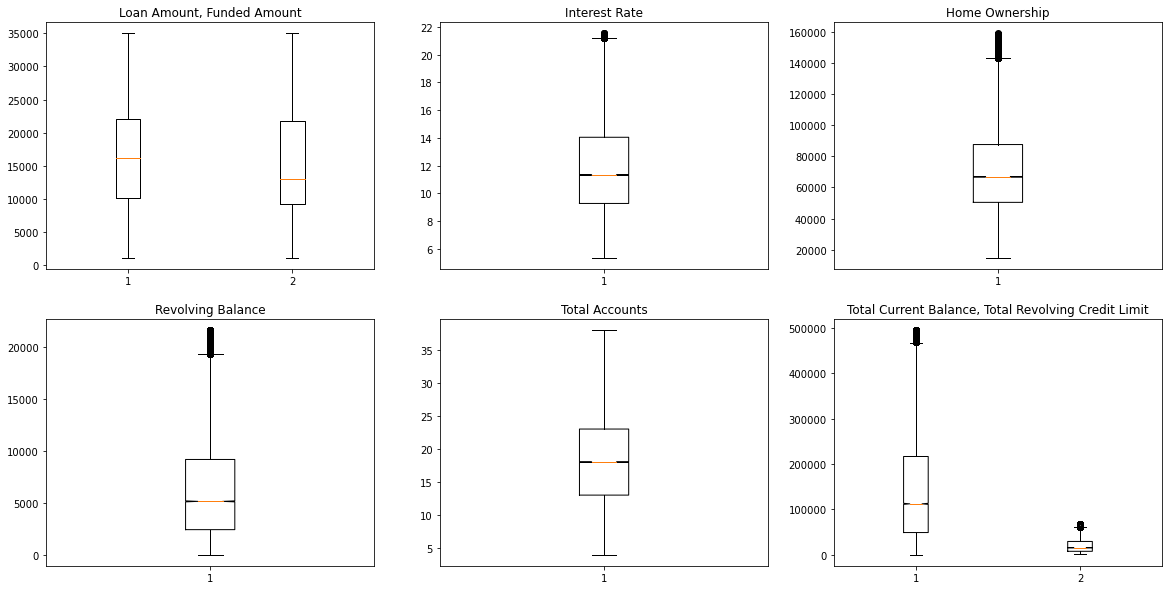

In [160]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))

axs[0, 0].boxplot(data[['Loan Amount', 'Funded Amount']])
axs[0, 0].set_title('Loan Amount, Funded Amount')

axs[0, 1].boxplot(data['Interest Rate'], 1)
axs[0, 1].set_title('Interest Rate')

axs[0, 2].boxplot(data['Home Ownership'], 1)
axs[0, 2].set_title('Home Ownership')

axs[1, 0].boxplot(data['Revolving Balance'], 1)
axs[1, 0].set_title('Revolving Balance')

axs[1, 1].boxplot(data['Total Accounts'], 1)
axs[1, 1].set_title('Total Accounts')

axs[1, 2].boxplot(data[['Total Current Balance', 'Total Revolving Credit Limit']], 1)
axs[1, 2].set_title('Total Current Balance, Total Revolving Credit Limit')

In [169]:
data_clean=data.copy()

In [170]:
data_clean

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status
1,1450153.0,3609.0,11940.0,59.0,12.237563,C,RENT,39833.92100,Debt consolidation,812.0,13.0,INDIVIDUAL,182610.0,20885.0,0.0
2,1969101.0,28276.0,9311.0,59.0,12.545884,F,MORTGAGE,91506.69105,Debt Consolidation,1843.0,20.0,INDIVIDUAL,89801.0,26155.0,0.0
3,6651430.0,11170.0,6954.0,59.0,16.731201,C,MORTGAGE,108286.57590,Debt consolidation,13819.0,12.0,INDIVIDUAL,9189.0,60214.0,0.0
4,14354669.0,16890.0,13226.0,59.0,15.008300,C,MORTGAGE,44234.82545,Credit card refinancing,1544.0,22.0,INDIVIDUAL,126029.0,22579.0,0.0
6,32737431.0,30844.0,19773.0,59.0,10.731432,C,RENT,102391.82430,Home improvement,14501.0,37.0,INDIVIDUAL,42069.0,31068.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67456,39022390.0,11703.0,19736.0,59.0,11.430757,E,MORTGAGE,50548.01172,Credit card refinancing,7787.0,24.0,INDIVIDUAL,74453.0,9771.0,0.0
67459,35182714.0,8323.0,11046.0,59.0,9.972104,C,RENT,65491.12817,Credit card refinancing,9737.0,14.0,INDIVIDUAL,22692.0,8714.0,0.0
67460,16435904.0,15897.0,32921.0,59.0,19.650943,A,MORTGAGE,34813.96985,Lending loan,2195.0,9.0,INDIVIDUAL,176857.0,42330.0,0.0
67461,5300325.0,16567.0,4975.0,59.0,13.169095,D,OWN,96938.83564,Debt consolidation,1172.0,15.0,INDIVIDUAL,361339.0,39075.0,0.0


In [187]:
purpose=pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_2\Project_Week_5\Mapping_purpose.csv')
purpose['Loan Title'] = purpose['Loan Title'].str.lower()
purpose

,Loan Title,Purpose_loan
0,bathroom,Home improvement
1,bill consolidation,Debt consolidation
2,bill payoff,Debt consolidation
3,bills,Debt consolidation
4,business,Business
...,...,...
78,refinance,Debt consolidation
79,refinance loan,Debt consolidation
80,relief,Other
81,vacation,Vacation


In [188]:
data_clean['Loan Title'] = data_clean['Loan Title'].str.lower()

In [192]:
data_clean=data_clean.join(purpose.set_index('Loan Title'), on='Loan Title', how='left')
data_clean

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status,Purpose_loan
1,1450153.0,3609.0,11940.0,59.0,12.237563,C,RENT,39833.92100,debt consolidation,812.0,13.0,INDIVIDUAL,182610.0,20885.0,0.0,Debt consolidation
2,1969101.0,28276.0,9311.0,59.0,12.545884,F,MORTGAGE,91506.69105,debt consolidation,1843.0,20.0,INDIVIDUAL,89801.0,26155.0,0.0,Debt consolidation
3,6651430.0,11170.0,6954.0,59.0,16.731201,C,MORTGAGE,108286.57590,debt consolidation,13819.0,12.0,INDIVIDUAL,9189.0,60214.0,0.0,Debt consolidation
4,14354669.0,16890.0,13226.0,59.0,15.008300,C,MORTGAGE,44234.82545,credit card refinancing,1544.0,22.0,INDIVIDUAL,126029.0,22579.0,0.0,Credit card
6,32737431.0,30844.0,19773.0,59.0,10.731432,C,RENT,102391.82430,home improvement,14501.0,37.0,INDIVIDUAL,42069.0,31068.0,0.0,Home improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67456,39022390.0,11703.0,19736.0,59.0,11.430757,E,MORTGAGE,50548.01172,credit card refinancing,7787.0,24.0,INDIVIDUAL,74453.0,9771.0,0.0,Credit card
67459,35182714.0,8323.0,11046.0,59.0,9.972104,C,RENT,65491.12817,credit card refinancing,9737.0,14.0,INDIVIDUAL,22692.0,8714.0,0.0,Credit card
67460,16435904.0,15897.0,32921.0,59.0,19.650943,A,MORTGAGE,34813.96985,lending loan,2195.0,9.0,INDIVIDUAL,176857.0,42330.0,0.0,Debt consolidation
67461,5300325.0,16567.0,4975.0,59.0,13.169095,D,OWN,96938.83564,debt consolidation,1172.0,15.0,INDIVIDUAL,361339.0,39075.0,0.0,Debt consolidation


In [240]:
data_rate = data_clean[['Loan Amount', 'Funded Amount', 'Term', ]].groupby([pd.cut(data_clean['Interest Rate'], bins=5, right=False)]).mean().round(2)
data_rate 

,Loan Amount,Funded Amount,Term
Interest Rate,,,
"[5.32, 8.564)",16795.68,15822.84,58.65
"[8.564, 11.807)",16941.48,15762.66,58.64
"[11.807, 15.051)",16787.14,15677.78,58.66
"[15.051, 18.294)",16834.17,15725.71,58.67
"[18.294, 21.554)",16671.51,15759.37,58.70


In [182]:
data_clean.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Term', 'Interest Rate', 'Grade',
       'Employment Duration', 'Home Ownership', 'Loan Title',
       'Revolving Balance', 'Total Accounts', 'Application Type',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [241]:
df_corr=data_clean[['Loan Amount', 'Funded Amount', 'Term', 'Interest Rate', 'Home Ownership', 
             'Revolving Balance', 'Total Accounts', 'Total Current Balance', 'Total Revolving Credit Limit']]
df_corr

,Loan Amount,Funded Amount,Term,Interest Rate,Home Ownership,Revolving Balance,Total Accounts,Total Current Balance,Total Revolving Credit Limit
1,3609.0,11940.0,59.0,12.237563,39833.92100,812.0,13.0,182610.0,20885.0
2,28276.0,9311.0,59.0,12.545884,91506.69105,1843.0,20.0,89801.0,26155.0
3,11170.0,6954.0,59.0,16.731201,108286.57590,13819.0,12.0,9189.0,60214.0
4,16890.0,13226.0,59.0,15.008300,44234.82545,1544.0,22.0,126029.0,22579.0
6,30844.0,19773.0,59.0,10.731432,102391.82430,14501.0,37.0,42069.0,31068.0
...,...,...,...,...,...,...,...,...,...
67456,11703.0,19736.0,59.0,11.430757,50548.01172,7787.0,24.0,74453.0,9771.0
67459,8323.0,11046.0,59.0,9.972104,65491.12817,9737.0,14.0,22692.0,8714.0
67460,15897.0,32921.0,59.0,19.650943,34813.96985,2195.0,9.0,176857.0,42330.0
67461,16567.0,4975.0,59.0,13.169095,96938.83564,1172.0,15.0,361339.0,39075.0


In [260]:
cut_interest=pd.DataFrame(pd.cut(data_clean['Interest Rate'], bins=5, retbins=True))
cut_interest

,1,2,3,4,6,7,8,9,11,12,...,67447,67449,67450,67453,67454,67456,67459,67460,67461,67462
Interest Rate,"(11.807, 15.051]","(11.807, 15.051]","(15.051, 18.294]","(11.807, 15.051]","(8.564, 11.807]","(11.807, 15.051]","(8.564, 11.807]","(5.304, 8.564]","(8.564, 11.807]","(5.304, 8.564]",...,"(8.564, 11.807]","(11.807, 15.051]","(8.564, 11.807]","(5.304, 8.564]","(11.807, 15.051]","(8.564, 11.807]","(8.564, 11.807]","(18.294, 21.538]","(11.807, 15.051]","(15.051, 18.294]"
Unnamed 0,8.56353,11.807055,15.05058,18.294104,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
pd.crosstab(pd.cut(data_clean['Interest Rate'], bins=5, right=False),data_clean['Grade'])

Grade,A,B,C,D,E,F,G
Interest Rate,,,,,,,
"[5.32, 8.564)",1552,2578,2515,1115,880,280,68
"[8.564, 11.807)",3159,5218,5122,2064,1574,533,149
"[11.807, 15.051)",2185,3491,3491,1516,1154,422,117
"[15.051, 18.294)",1242,1849,1922,831,666,223,50
"[18.294, 21.554)",404,522,606,246,211,70,28


In [257]:
data_clean[['Loan Amount', 'Funded Amount', 'Term', ]].groupby([pd.cut(data_clean['Interest Rate'], bins=5, retbins=True)]).mean().round(2)


TypeError: unhashable type: 'Series'

In [239]:
data_clean.to_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_2\Project_Week_5\data_clean.csv')

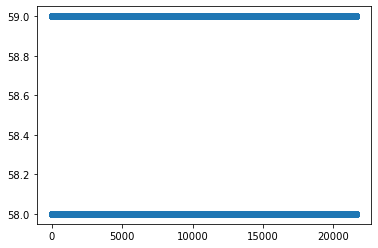

In [238]:
plt.scatter(data_clean['Revolving Balance'], data_clean['Term'])

In [237]:
data_clean.corr()


,ID,Loan Amount,Funded Amount,Term,Interest Rate,Home Ownership,Revolving Balance,Total Accounts,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,0.000028,-0.004282,0.017189,0.005639,0.000685,0.003616,-0.001490,-0.009877,-0.001445,NaN
Loan Amount,0.000028,1.000000,-0.001114,0.003641,-0.005343,0.015355,-0.006324,-0.000679,-0.011772,0.003342,NaN
Funded Amount,-0.004282,-0.001114,1.000000,-0.004716,-0.004651,-0.006525,-0.000120,0.011677,-0.002848,0.001250,NaN
Term,0.017189,0.003641,-0.004716,1.000000,0.028956,0.080726,0.038742,-0.000725,-0.010105,0.019094,NaN
Interest Rate,0.005639,-0.005343,-0.004651,0.028956,1.000000,0.006492,0.020269,0.009257,-0.001318,0.012994,NaN
Home Ownership,0.000685,0.015355,-0.006525,0.080726,0.006492,1.000000,0.013399,0.016356,0.013216,0.011533,NaN
Revolving Balance,0.003616,-0.006324,-0.000120,0.038742,0.020269,0.013399,1.000000,0.005786,-0.005883,0.017297,NaN
Total Accounts,-0.001490,-0.000679,0.011677,-0.000725,0.009257,0.016356,0.005786,1.000000,-0.001153,0.021889,NaN
Total Current Balance,-0.009877,-0.011772,-0.002848,-0.010105,-0.001318,0.013216,-0.005883,-0.001153,1.000000,0.000365,NaN
Total Revolving Credit Limit,-0.001445,0.003342,0.001250,0.019094,0.012994,0.011533,0.017297,0.021889,0.000365,1.000000,NaN


# OLD to keep but clean at the end

In [43]:
# Check low variance columns
low_variance = []
 
for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
 
print(low_variance)

['Public Record', 'Collection 12 months Medical', 'Accounts Delinquent', 'Loan Status']


In [44]:
def describe_unique_values(df, col):
    '''Display name and unique values of a column.'''
    print(f'\nUnique values')
    print(sorted(df[col].unique()))

column_lowvar=[col for col in data[['Public Record', 'Collection 12 months Medical', 'Accounts Delinquent', 'Loan Status']]]

for col in column_lowvar:
    describe_unique_values(data, col)
    print('\n--------------------')


Unique values
[0, 1, 2, 3, 4]

--------------------

Unique values
[0, 1]

--------------------

Unique values
[0]

--------------------

Unique values
[0, 1]

--------------------


In [69]:
data = data.drop(['Funded Amount Investor','Accounts Delinquent','Batch Enrolled', 'Payment Plan', 
                  'Open Account', 'Public Record', 'Initial List Status', 'Collection 12 months Medical', 
                  'Last week Pay', 'Delinquency - two years', 'Revolving Utilities', 'Total Received Interest', 
                  'Recoveries', 'Total Received Late Fee', 'Collection Recovery Fee', 'Debit to Income', 
                  'Sub Grade', 'Verification Status', 'Total Collection Amount'] , axis=1)

In [70]:
data

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Inquires - six months,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,59,11.135007,B,MORTGAGE,176346.62670,Debt Consolidation,0,24246,7,INDIVIDUAL,311301,6619,0
1,1450153,3609,11940,59,12.237563,C,RENT,39833.92100,Debt consolidation,0,812,13,INDIVIDUAL,182610,20885,0
2,1969101,28276,9311,59,12.545884,F,MORTGAGE,91506.69105,Debt Consolidation,0,1843,20,INDIVIDUAL,89801,26155,0
3,6651430,11170,6954,59,16.731201,C,MORTGAGE,108286.57590,Debt consolidation,0,13819,12,INDIVIDUAL,9189,60214,0
4,14354669,16890,13226,59,15.008300,C,MORTGAGE,44234.82545,Credit card refinancing,3,1544,22,INDIVIDUAL,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,59,9.408858,C,MORTGAGE,83961.15003,Credit card refinancing,0,4112,19,INDIVIDUAL,181775,34301,1
67459,35182714,8323,11046,59,9.972104,C,RENT,65491.12817,Credit card refinancing,0,9737,14,INDIVIDUAL,22692,8714,0
67460,16435904,15897,32921,59,19.650943,A,MORTGAGE,34813.96985,Lending loan,0,2195,9,INDIVIDUAL,176857,42330,0
67461,5300325,16567,4975,59,13.169095,D,OWN,96938.83564,Debt consolidation,0,1172,15,INDIVIDUAL,361339,39075,0


In [85]:
data.describe()

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Home Ownership,Inquires - six months,Revolving Balance,Total Accounts,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,58.173814,11.846258,80541.502522,0.145754,7699.342425,18.627929,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,3.327441,3.718629,45029.120366,0.473291,7836.148190,8.319246,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,36.000000,5.320006,14573.537170,0.000000,0.000000,4.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,58.000000,9.297147,51689.843335,0.000000,2557.000000,13.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,59.000000,11.377696,69335.832680,0.000000,5516.000000,18.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,59.000000,14.193533,94623.322785,0.000000,10184.500000,23.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,59.000000,27.182348,406561.536400,5.000000,116933.000000,72.000000,1.177412e+06,201169.000000,1.000000


In [76]:
stats = data.describe().transpose()
stats['range']=stats['max']- stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07,7.094785e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04,3.398600e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04,3.398500e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01,2.300000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01,2.186234e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05,3.919880e+05
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00
Revolving Balance,67463.0,7.699342e+03,7.836148e+03,0.000000e+00,2.557000e+03,5.516000e+03,1.018450e+04,1.169330e+05,1.169330e+05
Total Accounts,67463.0,1.862793e+01,8.319246e+00,4.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01,7.200000e+01,6.800000e+01
Total Current Balance,67463.0,1.595739e+05,1.390332e+05,6.170000e+02,5.037900e+04,1.183690e+05,2.283750e+05,1.177412e+06,1.176795e+06


In [80]:
stats['range']=0.005*stats['range']
stats

,count,mean,std,min,25%,50%,75%,max,range
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07,17736.961500
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04,8.496500
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04,8.496250
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01,0.005750
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01,0.005466
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05,97.997000
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.001250
Revolving Balance,67463.0,7.699342e+03,7.836148e+03,0.000000e+00,2.557000e+03,5.516000e+03,1.018450e+04,1.169330e+05,29.233250
Total Accounts,67463.0,1.862793e+01,8.319246e+00,4.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01,7.200000e+01,0.017000
Total Current Balance,67463.0,1.595739e+05,1.390332e+05,6.170000e+02,5.037900e+04,1.183690e+05,2.283750e+05,1.177412e+06,294.198750


In [86]:
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07,3.614492e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04,1.209400e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04,1.252650e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01,1.000000e+00
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01,4.896386e+00
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05,4.293348e+04
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
Revolving Balance,67463.0,7.699342e+03,7.836148e+03,0.000000e+00,2.557000e+03,5.516000e+03,1.018450e+04,1.169330e+05,7.627500e+03
Total Accounts,67463.0,1.862793e+01,8.319246e+00,4.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01,7.200000e+01,1.000000e+01
Total Current Balance,67463.0,1.595739e+05,1.390332e+05,6.170000e+02,5.037900e+04,1.183690e+05,2.283750e+05,1.177412e+06,1.779960e+05


In [91]:
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    print(col)
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

ID
Loan Amount
Funded Amount
Term
Interest Rate
Home Ownership
Inquires - six months
Revolving Balance
Total Accounts
Total Current Balance
Total Revolving Credit Limit
Loan Status


,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Inquires - six months,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status,Outlier
5,50509046,34631,30203,36,17.246986,B,RENT,98957.47561,Credit card refinancing,2,2277,20,INDIVIDUAL,51252,27480,0,Term
15,9813088,27859,33502,36,14.848190,B,OWN,68062.59950,Credit card refinancing,0,5904,13,INDIVIDUAL,212092,15379,1,Term
57,29852082,14592,12927,36,14.320346,C,RENT,134629.24640,Credit card refinancing,0,1570,15,INDIVIDUAL,136171,111908,0,Term
73,56187609,15190,13289,36,6.130753,C,RENT,156853.07440,Credit card refinancing,0,7250,24,INDIVIDUAL,382209,33057,0,Term
126,30669778,8539,5308,36,18.042220,C,RENT,217495.60130,Debt consolidation,1,7295,15,INDIVIDUAL,271792,5391,0,Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67398,38336158,15939,8863,36,11.859881,C,RENT,61321.22951,Debt consolidation,0,16852,14,INDIVIDUAL,185946,33165,1,Loan Status
67402,3299287,13164,17566,59,9.998247,B,MORTGAGE,57888.60981,Debt consolidation,1,1564,25,INDIVIDUAL,181342,4530,1,Loan Status
67404,15326633,29162,8441,58,7.899935,B,MORTGAGE,19811.05072,Credit card refinancing,0,2606,9,INDIVIDUAL,420264,2080,1,Loan Status
67427,59234192,24027,22059,59,11.373465,D,MORTGAGE,84076.60589,Debt consolidation,0,15977,19,INDIVIDUAL,21135,59007,1,Loan Status


In [111]:
for col in stats.index:
    q25=data[col].quantile(0.25)
    q25
    q75=data[col].quantile(0.75)
    iqr=q75-q25
    ul = q75+(1.5*intr_qr)
    ll = q25-(1.5*intr_qr)
    print(col, " ", ul, " ", ll)
    
    
    
    

ID   nan   nan
Loan Amount   nan   nan
Funded Amount   nan   nan
Term   nan   nan
Interest Rate   nan   nan
Home Ownership   nan   nan
Inquires - six months   nan   nan
Revolving Balance   nan   nan
Total Accounts   nan   nan
Total Current Balance   nan   nan
Total Revolving Credit Limit   nan   nan
Loan Status   nan   nan


In [99]:
for x in data.columns():
    for i in x:
        q75,q25 = np.percentile(data[x].loc[:,i],[75,25])
        print(q25)
    
    """intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
print()"""

TypeError: 'Index' object is not callable

In [95]:
data['Interest Rate'].isna().sum()

851

In [81]:
outliers = pd.DataFrame(columns=data.columns)
 
for col in stats.index:
    lower = stats.at[col,'range']
    upper = stats.at[col,'max'] - stats.at[col,'range']
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

,ID,Loan Amount,Funded Amount,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Loan Title,Inquires - six months,Revolving Balance,Total Accounts,Application Type,Total Current Balance,Total Revolving Credit Limit,Loan Status,Outlier
16080,72245779,12898,10646,59,11.887171,B,RENT,79399.55861,Debt consolidation,0,8248,22,INDIVIDUAL,8010,36413,0,ID
24347,14350617,34995,11167,58,11.488910,A,OWN,73858.61976,Debt consolidation,0,1844,30,INDIVIDUAL,99816,105911,0,Loan Amount
26928,1736461,34999,22824,59,15.995020,F,RENT,42885.89912,Credit card refinancing,0,992,19,INDIVIDUAL,212271,30641,0,Loan Amount
49120,23987766,35000,13852,59,16.169184,B,MORTGAGE,95893.78945,Debt consolidation,0,2056,25,INDIVIDUAL,30324,3436,0,Loan Amount
49631,22095554,34996,12238,59,7.767845,C,RENT,26219.77753,Other,0,12830,10,INDIVIDUAL,133562,26367,0,Loan Amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,59,9.408858,C,MORTGAGE,83961.15003,Credit card refinancing,0,4112,19,INDIVIDUAL,181775,34301,1,Loan Status
67459,35182714,8323,11046,59,9.972104,C,RENT,65491.12817,Credit card refinancing,0,9737,14,INDIVIDUAL,22692,8714,0,Loan Status
67460,16435904,15897,32921,59,19.650943,A,MORTGAGE,34813.96985,Lending loan,0,2195,9,INDIVIDUAL,176857,42330,0,Loan Status
67461,5300325,16567,4975,59,13.169095,D,OWN,96938.83564,Debt consolidation,0,1172,15,INDIVIDUAL,361339,39075,0,Loan Status


In [64]:
outliers.groupby('Outlier')[['Interest Rate','Outlier']]

In [21]:
data.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [27]:
data.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


<AxesSubplot:>

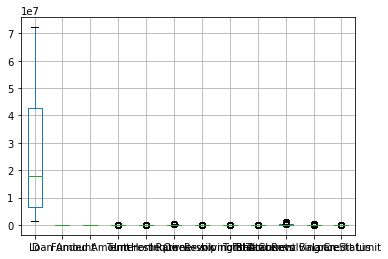

In [83]:
data.boxplot()

<AxesSubplot:>

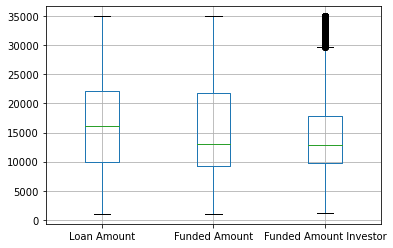

In [36]:
data.boxplot(column=['Loan Amount', 'Funded Amount', 'Funded Amount Investor'])

<AxesSubplot:>

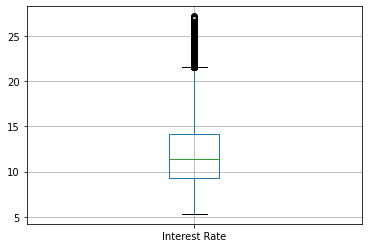

In [54]:
data.boxplot(column=['Interest Rate'])


In [84]:
data.columns
data.boxplot(column)

Index(['ID', 'Loan Amount', 'Funded Amount', 'Term', 'Interest Rate', 'Grade',
       'Employment Duration', 'Home Ownership', 'Loan Title',
       'Inquires - six months', 'Revolving Balance', 'Total Accounts',
       'Application Type', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

<AxesSubplot:>

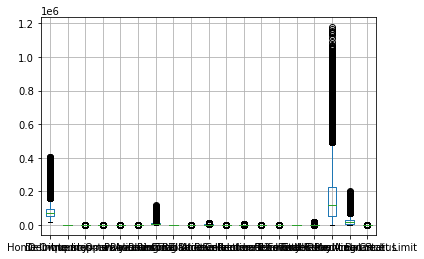

In [37]:
data.boxplot(column=['Home Ownership',,
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest',
       'Total Received Late Fee', 
       'Collection 12 months Medical', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'])